<a href="https://colab.research.google.com/github/SKamara84/Weather_info/blob/main/Daily_Arima2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

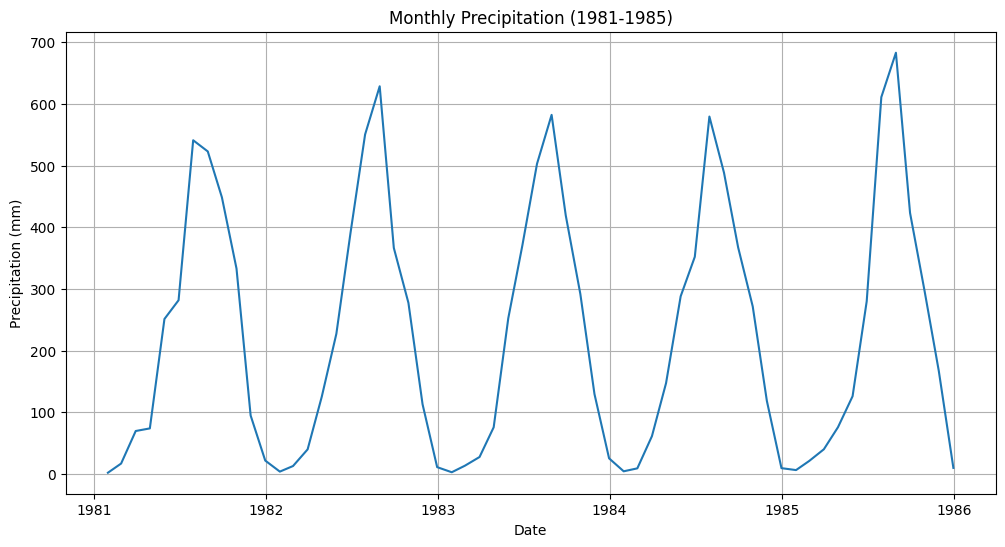

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load data
df = pd.read_csv("sl_rain_81_85.csv", parse_dates=["time_start"], index_col="time_start")

# Resample to monthly totals
monthly_data = df.resample('ME').sum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data)
plt.title("Monthly Precipitation (1981-1985)")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.grid()
plt.show()

In [5]:
# Augmented Dickey-Fuller test for stationarity
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value:.3f}')

adf_test(monthly_data['precipitation'])

ADF Statistic: -2.293
p-value: 0.174
Critical Values:
  1%: -3.575
  5%: -2.924
  10%: -2.600


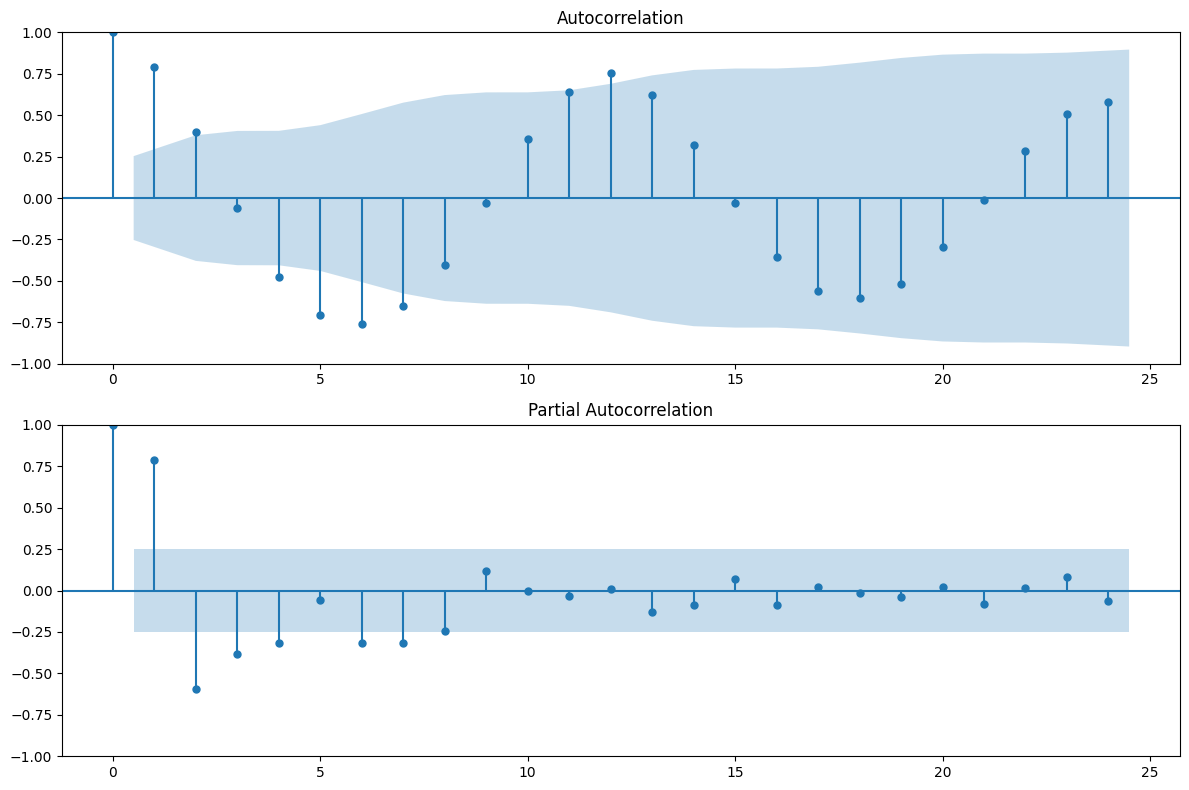

In [6]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(monthly_data['precipitation'], lags=24, ax=ax1)
plot_pacf(monthly_data['precipitation'], lags=24, ax=ax2)
plt.tight_layout()
plt.show()

In [7]:
# Example SARIMA parameters (adjust based on ACF/PACF)
order = (1, 1, 1)          # Non-seasonal (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal (P, D, Q, m)

# Fit the model
model = SARIMAX(
    monthly_data['precipitation'],
    order=order,
    seasonal_order=seasonal_order
)
results = model.fit(disp=False)
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                      precipitation   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -249.491
Date:                            Wed, 29 Jan 2025   AIC                            508.982
Time:                                    12:01:57   BIC                            518.233
Sample:                                01-31-1981   HQIC                           512.463
                                     - 12-31-1985                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1511      0.175      0.864      0.388      -0.192       0.494
ma.L1         -0.9993     10.941   

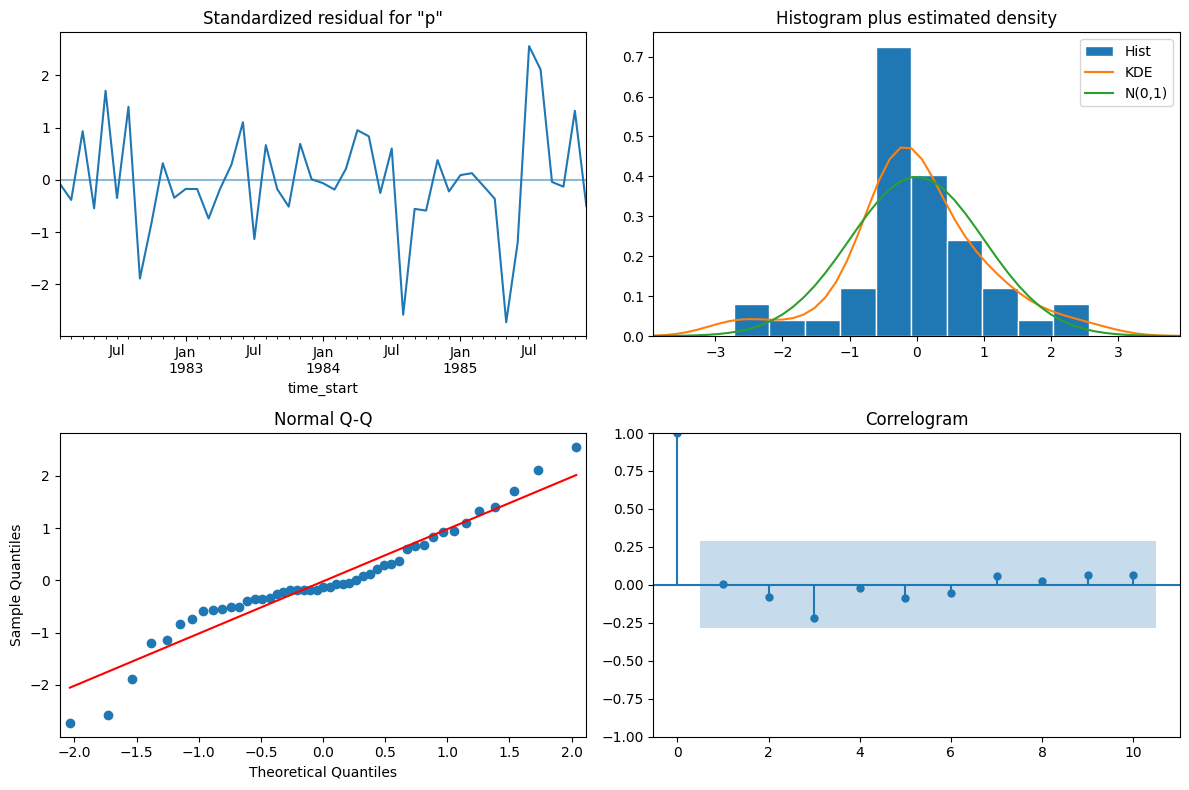

In [8]:
# Residual diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

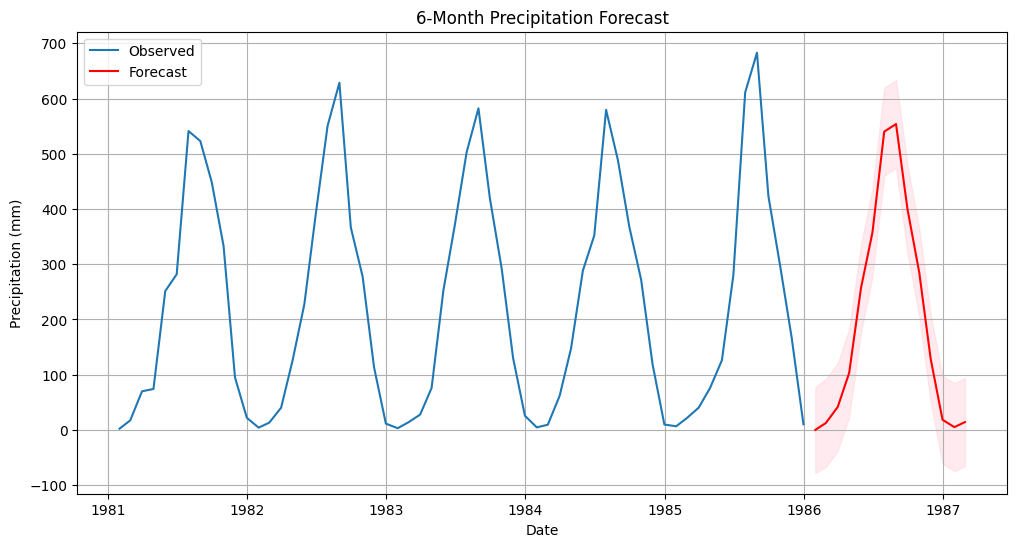


6-Month Forecast:
1986-01-31     -0.17
1986-02-28     12.48
1986-03-31     41.46
1986-04-30    103.19
1986-05-31    256.83
1986-06-30    357.06
1986-07-31    540.10
1986-08-31    553.79
1986-09-30    399.80
1986-10-31    284.43
1986-11-30    128.19
1986-12-31     18.24
1987-01-31      4.87
1987-02-28     14.07
Freq: ME, Name: predicted_mean, dtype: float64


In [27]:
# Forecast next 6 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['precipitation'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink',
    alpha=0.3
)
plt.title("6-Month Precipitation Forecast")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid()
plt.show()

# Display forecast values
print("\n6-Month Forecast:")
print(forecast_mean.round(2))

In [24]:
# prompt: write code to group a data by months and sum its values

import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Replace 'your_data.csv' with the actual filename if needed
df = pd.read_csv("/content/sl_rain_86_90.csv", parse_dates=["time_start"], index_col="time_start")

# Group by month and sum the values
monthly_sums = df.resample('ME').sum()

monthly_sums

,precipitation
time_start,
1986-01-31,3.503
1986-02-28,13.250
1986-03-31,24.785
1986-04-30,77.175
1986-05-31,224.137
1986-06-30,272.072
1986-07-31,502.209
1986-08-31,640.221
1986-09-30,384.612


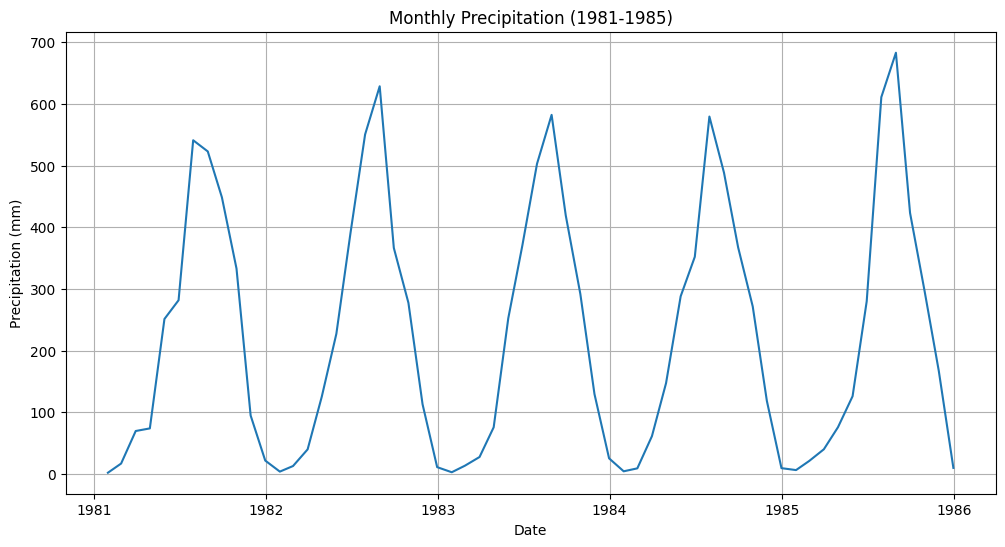

ADF Statistic: -2.293
p-value: 0.174
Critical Values:
  1%: -3.575
  5%: -2.924
  10%: -2.600


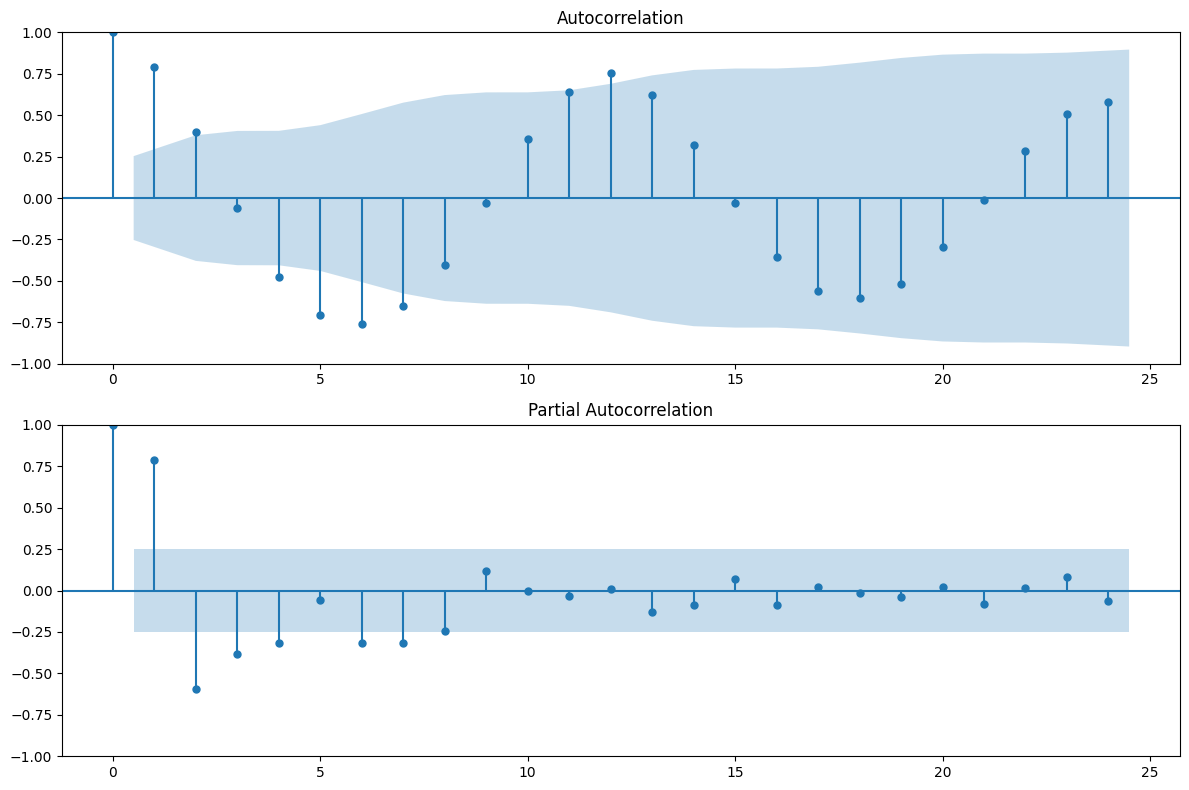

                                     SARIMAX Results                                      
Dep. Variable:                      precipitation   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -249.491
Date:                            Wed, 29 Jan 2025   AIC                            508.982
Time:                                    12:51:10   BIC                            518.233
Sample:                                01-31-1981   HQIC                           512.463
                                     - 12-31-1985                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1511      0.175      0.864      0.388      -0.192       0.494
ma.L1         -0.9993     10.941   

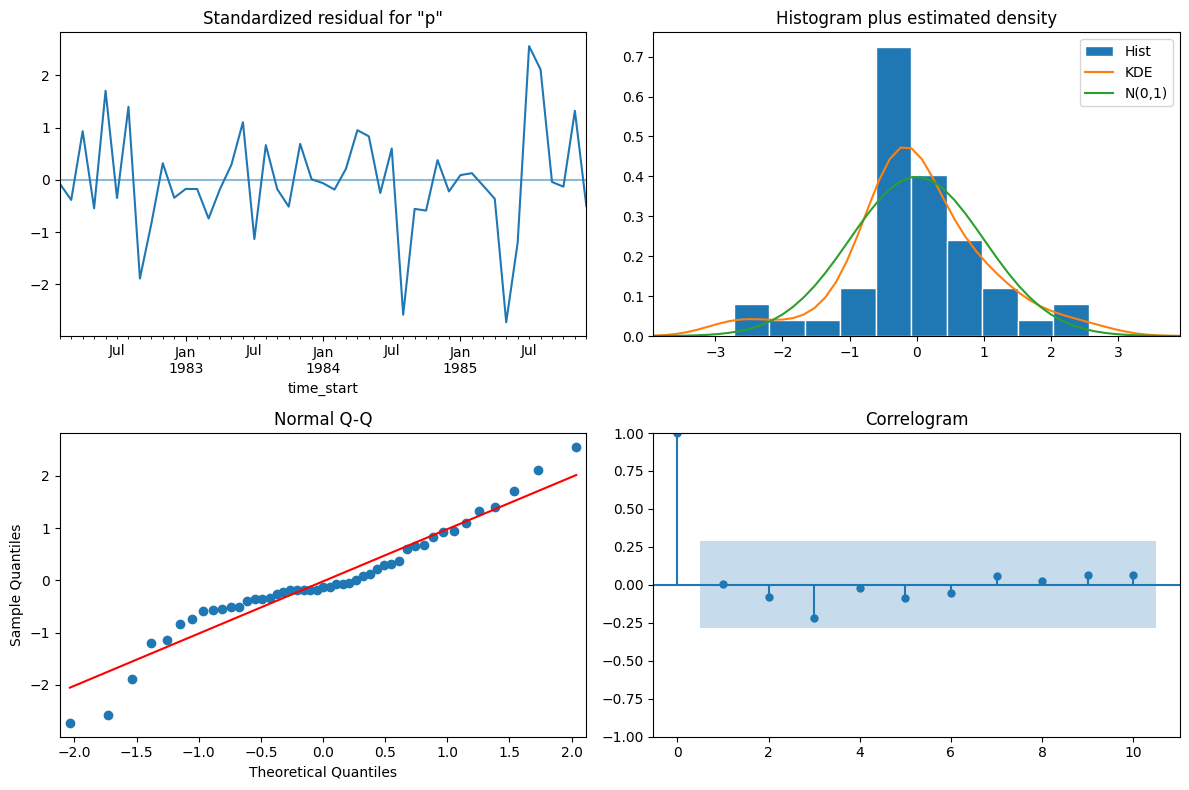

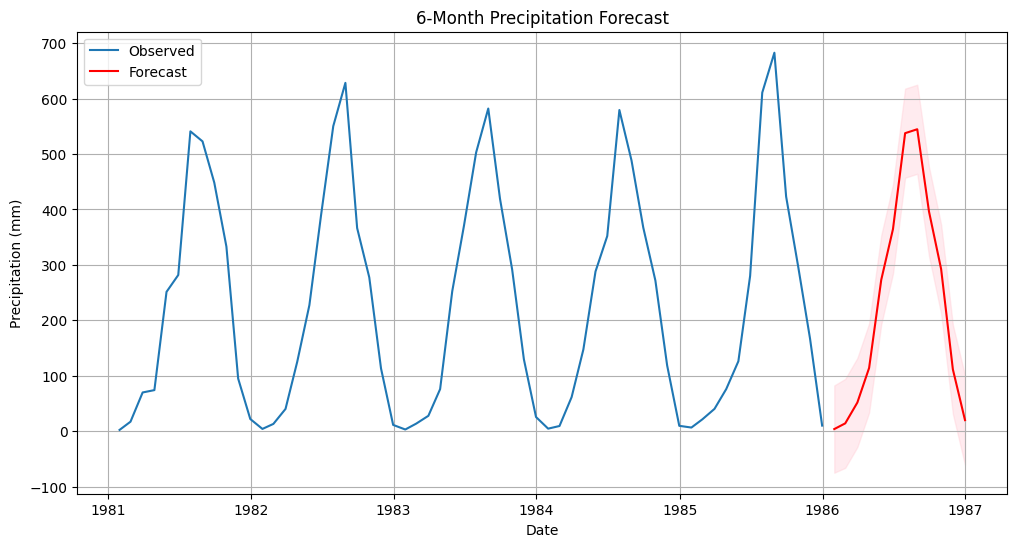


6-Month Forecast:
1986-01-31      3.69
1986-02-28     13.98
1986-03-31     51.60
1986-04-30    113.97
1986-05-31    273.00
1986-06-30    364.65
1986-07-31    537.72
1986-08-31    544.82
1986-09-30    396.31
1986-10-31    292.44
1986-11-30    111.40
1986-12-31     19.82
Freq: ME, Name: predicted_mean, dtype: float64


,precipitation
time_start,
1986-01-31,3.503
1986-02-28,13.250
1986-03-31,24.785
1986-04-30,77.175
1986-05-31,224.137
1986-06-30,272.072
1986-07-31,502.209
1986-08-31,640.221
1986-09-30,384.612


In [28]:
# prompt: supress warnings

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from google.colab import data_table
#

# Load data
df = pd.read_csv("sl_rain_81_85.csv", parse_dates=["time_start"], index_col="time_start")

# Resample to monthly totals
monthly_data = df.resample('ME').sum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data)
plt.title("Monthly Precipitation (1981-1985)")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.grid()
plt.show()
# Augmented Dickey-Fuller test for stationarity
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value:.3f}')

adf_test(monthly_data['precipitation'])
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(monthly_data['precipitation'], lags=24, ax=ax1)
plot_pacf(monthly_data['precipitation'], lags=24, ax=ax2)
plt.tight_layout()
plt.show()
# Example SARIMA parameters (adjust based on ACF/PACF)
order = (1, 1, 1)          # Non-seasonal (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal (P, D, Q, m)

# Fit the model
model = SARIMAX(
    monthly_data['precipitation'],
    order=order,
    seasonal_order=seasonal_order
)
results = model.fit(disp=False)
print(results.summary())
# Residual diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()
# Forecast next 6 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['precipitation'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink',
    alpha=0.3
)
plt.title("6-Month Precipitation Forecast")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid()
plt.show()

# Display forecast values
print("\n6-Month Forecast:")
print(forecast_mean.round(2))

data_table.enable_dataframe_formatter()

# Replace 'your_data.csv' with the actual filename if needed
df = pd.read_csv("/content/sl_rain_86_90.csv", parse_dates=["time_start"], index_col="time_start")

# Group by month and sum the values
monthly_sums = df.resample('ME').sum()

monthly_sums

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Install pmdarima if not already installed
!pip install pmdarima

from pmdarima import auto_arima

# Auto-tune SARIMA parameters
model_auto = auto_arima(
    monthly_data['precipitation'],
    seasonal=True,
    m=12,                # Yearly seasonality
    stepwise=True,
    trace=True,
    suppress_warnings=True,
    error_action="ignore"
)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=528.667, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=520.143, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=526.710, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=528.163, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=513.200, Time=2.75 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=513.580, Time=2.97 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=513.320, Time=0.51 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=514.630, Time=1.07 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=513.098, Time=0.76 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=520.123, Time=0.27 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=513.31

In [20]:
# Extract best parameters from auto_arima
order = model_auto.order
seasonal_order = model_auto.seasonal_order

# Refit SARIMA with 95% CI
model = SARIMAX(
    monthly_data['precipitation'],
    order=order,
    seasonal_order=seasonal_order
)
results = model.fit(disp=False)

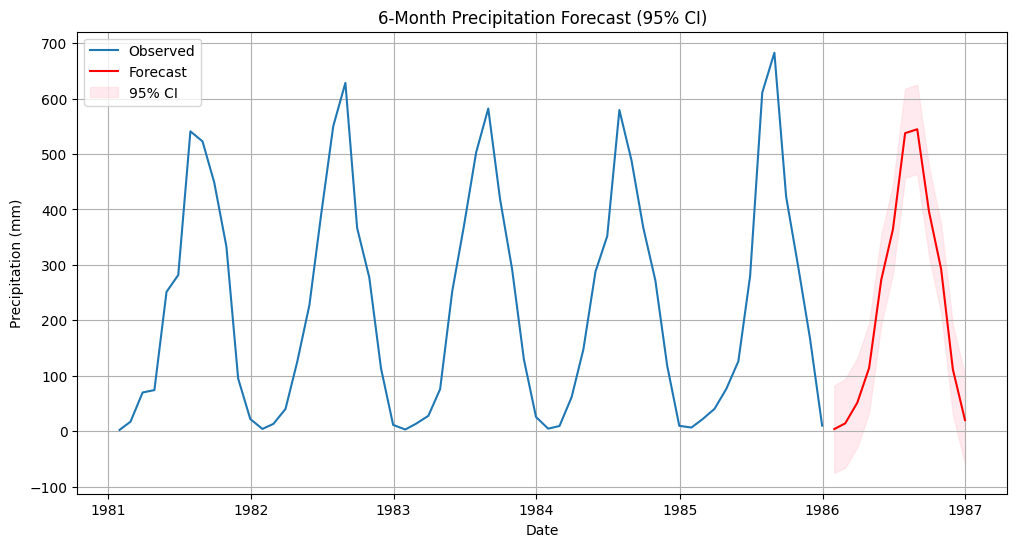


6-Month Forecast (95% CI):
1986-01-31      3.69
1986-02-28     13.98
1986-03-31     51.60
1986-04-30    113.97
1986-05-31    273.00
1986-06-30    364.65
1986-07-31    537.72
1986-08-31    544.82
1986-09-30    396.31
1986-10-31    292.44
1986-11-30    111.40
1986-12-31     19.82
Freq: ME, Name: predicted_mean, dtype: float64


In [30]:
import warnings
warnings.filterwarnings('ignore')

# Forecast with explicit 95% confidence level
forecast = results.get_forecast(steps=12, alpha=0.05)  # 95% CI
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot with 95% CI
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['precipitation'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% CI'
)
plt.title("6-Month Precipitation Forecast (95% CI)")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid()
plt.show()

# Display forecast values
print("\n6-Month Forecast (95% CI):")
print(forecast_mean.round(2))